In [1]:
import pandas as pd
import scipy.io
import scipy.signal as ss
import pywt
import glob
import matplotlib.pyplot as plt
import scaleogram as scg
from scaleogram import cws
import numpy as np
from math import *
import os

In [2]:
print(os.getcwd())
for x in range(1):
    os.chdir('..')
print (os.getcwd())

D:\GitCloneProject\HeartResearch\Data Preprocessing
D:\GitCloneProject\HeartResearch


In [3]:
main_data_dir = os.getcwd() + "\Data set"
print(os.listdir(main_data_dir))

['CPSC0236 (1)', 'Gaussian_Filter', 'Median_Filter', 'Output.png', 'README.md', 'Scaleogram_512_256', 'TrainingSet1', 'TrainingSet2', 'TrainingSet3']


In [4]:
data_mat_files = glob.glob(main_data_dir + "\TrainingSet*\*")

In [5]:
print(data_mat_files[0])

D:\GitCloneProject\HeartResearch\Data set\TrainingSet1\A0001.mat


In [6]:
mat = scipy.io.loadmat(data_mat_files[0])
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 19 16:06:41 2017', '__version__': '1.0', '__globals__': [], 'ECG': array([[(array(['Male'], dtype='<U4'), array([[74]], dtype=uint8), array([[ 0.0282288 ,  0.0392288 ,  0.0452288 , ...,  0.2582288 ,
         0.2592288 ,  0.2592288 ],
       [ 0.00672947,  0.01072947,  0.01472947, ...,  0.24772947,
         0.24872947,  0.24972947],
       [-0.02149933, -0.02849933, -0.03049933, ..., -0.01049933,
        -0.01049933, -0.00949933],
       ...,
       [-0.11200653, -0.11000653, -0.10800653, ...,  0.19399347,
         0.19399347,  0.19499347],
       [-0.5959572 , -0.5899572 , -0.5819572 , ...,  0.3070428 ,
         0.3070428 ,  0.3070428 ],
       [-0.01558507, -0.00658507,  0.00241493, ...,  0.21341493,
         0.21441493,  0.21441493]]))]],
      dtype=[('sex', 'O'), ('age', 'O'), ('data', 'O')])}


In [7]:
def data_extract(signal_raw_list):
    signal_number_list = []
    signal_list = []
    
    for signal in signal_raw_list:
        mat = scipy.io.loadmat(signal)
        signal_list.append(mat['ECG'][0][0][2])
        signal_number = signal.split('\\')[-1].split('.')[0]
        signal_number_list.append(signal_number)

    return (signal_list, signal_number_list)

signal_list, signal_number = data_extract(data_mat_files)

In [8]:
def median_filter(signal_raw_list):
    median_fil_list = []

    for signal in signal_raw_list:
        median_fil = ss.medfilt(signal)
        median_fil_list.append(median_fil)    
    return median_fil_list
    
median_fil_list = median_filter(signal_list)
print(median_fil_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
def save_data_filter(data, signal_number, folder):
    for i in range(len(data)):
        save_dic_data = {"ECG": data[i]}
        scipy.io.savemat(os.getcwd() + "\Data set\{}\{}.mat".format(folder,signal_number[i]), save_dic_data)

In [10]:
save_data_filter(median_fil_list, signal_number, folder = "Median_Filter")

In [11]:
len(median_fil_list[1][2])

5000

In [12]:
output_path = main_data_dir + "\Scaleogram_512_256\{}_{}_{}"
scg.set_default_wavelet('morl')
px = 1/plt.rcParams['figure.dpi']
lead = ['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6']

def scaleogram(data, folder):
    for i in range(len(data)):
        for j in range(len(lead)):
            
            signal_length = len(data[i][j])
            # range of scales to perform the transform
            scales = scg.periods2scales(np.arange(1, signal_length+1))
            x_values_wvt_arr = range(0,len(data[i][j]),1)

            # plot the signal 
            # fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
            # ax1.plot(x_values_wvt_arr, data[i][j], linewidth=3, color='blue')
            # ax1.set_xlim(0, signal_length)
            # ax1.set_title("ECG")

            # the scaleogram
            fig = cws(data[i][j], scales=scales, figsize=(512*px, 256*px), coi = False)
            print(fig)
            plt.axis('off')
            plt.savefig(output_path.format(folder, signal_number[i],lead[j]), bbox_inches='tight', pad_inches = 0)

AxesSubplot(0.125,0.11;0.713x0.77)
AxesSubplot(0.125,0.11;0.713x0.77)
AxesSubplot(0.125,0.11;0.713x0.77)
AxesSubplot(0.125,0.11;0.713x0.77)


KeyboardInterrupt: 

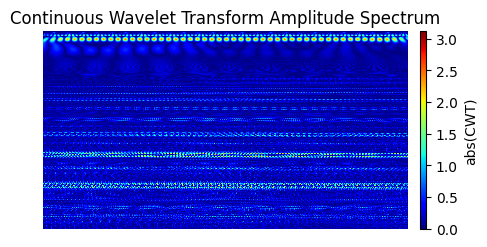

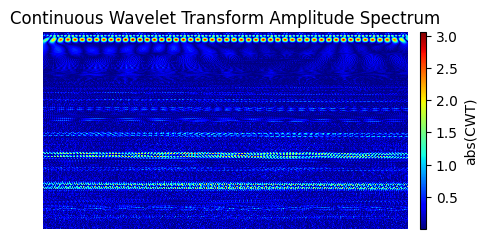

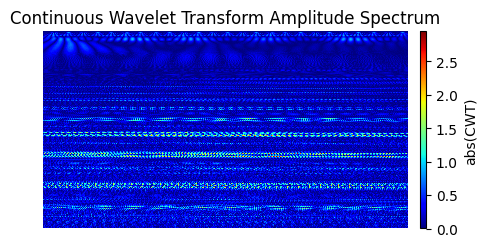

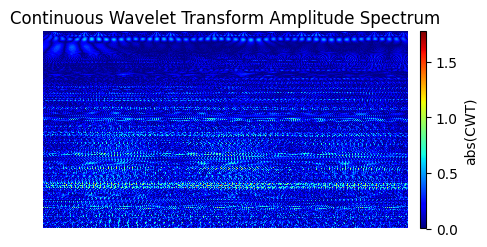

In [13]:
scaleogram(median_fil_list[:1], folder = "Median_Filter")

In [ ]:
def gaussian_filter(signal_raw_list, std):
    gauss_filt = []
    n_bins = signal_raw_list.shape[2]
    M = n_bins - 1 if n_bins % 2 == 0 else n_bins
    window = ss.gaussian(M, std = std)

    for signal in signal_raw_list:
        for i in range(signal.shape[0]):
            gauss_filter = ss.convolve(signal[i], window, mode='same', method='auto')
            gauss_filt.append(gauss_filter)    
    return gauss_filt

In [ ]:
gauss_filt = gaussian_filter(signal_list, std=1)

In [ ]:
gauss_filt_array = (np.array(gauss_filt)).reshape(6877,12,3000)
gauss_filt_list = []
for i in range(gauss_filt_array.shape[0]):
    gauss_filt_list.append(gauss_filt_array[i])

In [ ]:
save_data_filter(gauss_filt_list, signal_number, folder = "Gaussian_Filter")

In [ ]:
scaleogram(gauss_filt_list[:1], folder = "Gaussian_Filter")